# Chess Insights

In [69]:
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import os
import psycopg2
import requests

In [70]:
BASE_URL = "https://diamondchessapi.vercel.app/api/chess"

USERNAME = "hikaru"

load_dotenv()

POSTGRESQL_USERNAME = os.getenv("POSTGRESQL_USERNAME")
POSTGRESQL_PASSWORD = os.getenv("POSTGRESQL_PASSWORD")
POSTGRESQL_HOST = os.getenv("POSTGRESQL_HOST")
POSTGRESQL_PORT = os.getenv("POSTGRESQL_PORT")
POSTGRESQL_DATABASE = os.getenv("POSTGRESQL_DATABASE")

## Player

In [71]:
response = requests.get(f'{BASE_URL}/{USERNAME}')
player = response.json()
player

{'id': 15448422,
 'username': 'hikaru',
 'name': 'Hikaru Nakamura',
 'followers': 1160801,
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/15448422.da101127.200x200o.64ebfda98bc2.png',
 'location': 'Sunrise, Florida',
 'country': 'United States',
 'countryCode': 'US',
 'twitchUrl': 'https://twitch.tv/gmhikaru',
 'isStreamer': True,
 'verified': False,
 'lastOnline': '2023-06-22T12:06:12.000Z',
 'joined': '2014-01-06T21:20:58.000Z',
 'status': 'premium',
 'title': 'GM',
 'league': 'Legend',
 'statsDailyRatingBest': 2464,
 'statsDailyRatingLast': 2239,
 'statsDailyRatingDeviation': 103,
 'statsDailyRecordWin': 73,
 'statsDailyRecordDraw': 4,
 'statsDailyRecordLoss': 11,
 'statsRapidRatingBest': 2927,
 'statsRapidRatingLast': 2781,
 'statsRapidRatingDeviation': 62,
 'statsRapidRecordWin': 156,
 'statsRapidRecordDraw': 157,
 'statsRapidRecordLoss': 39,
 'statsBlitzRatingLast': 3220,
 'statsBlitzRatingBest': 3332,
 'statsBlitzRatingDeviation': 23,
 'statsBlitzRecordWin': 24400,

# Analyse

In [72]:
connection = psycopg2.connect(user=POSTGRESQL_USERNAME,
                              password=POSTGRESQL_PASSWORD,
                              host=POSTGRESQL_HOST,
                              port=POSTGRESQL_PORT,
                              database=POSTGRESQL_DATABASE)

## Rules

In [73]:
cursor = connection.cursor()
select_unique_rules_where_query = f'WHERE g."whiteUsername" = \'{USERNAME}\' OR g."blackUsername" = \'{USERNAME}\''
select_unique_rules_query = f'SELECT DISTINCT g."rules" FROM public."Game" as g {select_unique_rules_where_query}'
cursor.execute(select_unique_rules_query)
rules = cursor.fetchall()
print(rules)
cursor.close()

[('bughouse',), ('chess',), ('chess960',), ('crazyhouse',), ('kingofthehill',), ('oddschess',), ('threecheck',)]


## Result

In [74]:
cursor = connection.cursor()
select_unique_result_where_query = f'WHERE (g."whiteUsername" = \'{USERNAME}\' OR g."blackUsername" = \'{USERNAME}\') AND g."rules" = \'chess\''
select_unique_white_result_query = f'SELECT DISTINCT g."whiteResult" FROM public."Game" as g {select_unique_result_where_query} ORDER BY g."whiteResult" ASC'
select_unique_black_result_query = f'SELECT DISTINCT g."blackResult" FROM public."Game" as g {select_unique_result_where_query} ORDER BY g."blackResult" ASC'
cursor.execute(select_unique_white_result_query)
white_results = cursor.fetchall()
print(white_results)
cursor.execute(select_unique_black_result_query)
black_results = cursor.fetchall()
print(black_results)
cursor.close()

[('50move',), ('abandoned',), ('agreed',), ('checkmated',), ('insufficient',), ('repetition',), ('resigned',), ('stalemate',), ('timeout',), ('timevsinsufficient',), ('win',)]
[('50move',), ('abandoned',), ('agreed',), ('checkmated',), ('insufficient',), ('repetition',), ('resigned',), ('stalemate',), ('timeout',), ('timevsinsufficient',), ('win',)]


## Accuracy

In [75]:
cursor = connection.cursor()
select_average_accuracy_query = f'SELECT AVG(CASE WHEN g."whiteUsername" = \'{USERNAME}\' THEN g."whiteAccuracy" ELSE g."blackAccuracy" END) as "average" FROM public."Game" as g WHERE (g."whiteResult" != \'abandoned\' OR g."blackResult" != \'abandoned\') AND g."whiteAccuracy" != 0 AND g."blackAccuracy" != 0 AND g."rules" = \'chess\' AND g."rated" = true'
cursor.execute(select_average_accuracy_query)
accuracy = cursor.fetchall()
print(accuracy)
cursor.close()

[(89.1570957828861,)]


## Win Results

In [76]:
cursor = connection.cursor()
count_group_by_result_when_win_query = f'SELECT (CASE WHEN g."whiteUsername" = \'{USERNAME}\' THEN g."blackResult" ELSE g."whiteResult" END) as "result", COUNT(CASE WHEN g."whiteUsername" = \'{USERNAME}\' THEN g."blackResult" ELSE g."whiteResult" END) as "count" FROM public."Game" as g WHERE TEXT(CASE WHEN g."whiteUsername" = \'{USERNAME}\' THEN g."whiteResult" ELSE g."blackResult" END) = \'win\' AND g."rules" = \'chess\' AND g."rated" = true GROUP BY CASE WHEN g."whiteUsername" = \'{USERNAME}\' THEN g."blackResult" ELSE g."whiteResult" END ORDER BY "count" ASC'
cursor.execute(count_group_by_result_when_win_query)
count_group_by_result_when_win = cursor.fetchall()
print(count_group_by_result_when_win)
cursor.close()

[('abandoned', 51), ('checkmated', 2328), ('timeout', 4309), ('resigned', 28417)]


## Time Class

In [77]:
cursor = connection.cursor()
select_unique_time_class_where_query = f'WHERE g."whiteUsername" = \'{USERNAME}\' OR g."blackUsername" = \'{USERNAME}\''
select_unique_time_class_query = f'SELECT DISTINCT g."timeClass" FROM public."Game" as g {select_unique_time_class_where_query}'
cursor.execute(select_unique_time_class_query)
time_classes = cursor.fetchall()
print(time_classes)
cursor.close()

[('blitz',), ('bullet',), ('daily',), ('rapid',)]


## Time Control

In [78]:
cursor = connection.cursor()
select_unique_time_control_where_query = f'WHERE g."whiteUsername" = \'{USERNAME}\' OR g."blackUsername" = \'{USERNAME}\''
select_unique_time_control_query = f'SELECT DISTINCT g."timeClass", g."timeControl" FROM public."Game" as g {select_unique_time_control_where_query} ORDER BY g."timeClass" ASC'
cursor.execute(select_unique_time_control_query)
time_controls = cursor.fetchall()
print(time_controls)
cursor.close()

[('blitz', '180'), ('blitz', '180+1'), ('blitz', '180+2'), ('blitz', '180+3'), ('blitz', '180+5'), ('blitz', '240'), ('blitz', '300'), ('blitz', '300+1'), ('blitz', '300+2'), ('blitz', '300+3'), ('blitz', '300+5'), ('blitz', '420'), ('blitz', '480'), ('blitz', '480+2'), ('blitz', '600'), ('blitz', '600+2'), ('blitz', '600+5'), ('bullet', '10'), ('bullet', '120'), ('bullet', '120+1'), ('bullet', '30'), ('bullet', '60'), ('bullet', '60+1'), ('daily', '1/1209600'), ('daily', '1/172800'), ('daily', '1/259200'), ('daily', '1/432000'), ('daily', '1/604800'), ('daily', '1/86400'), ('rapid', '1200'), ('rapid', '1200+10'), ('rapid', '1500+10'), ('rapid', '1800'), ('rapid', '2700'), ('rapid', '2700+15'), ('rapid', '300+10'), ('rapid', '3600+45'), ('rapid', '600'), ('rapid', '600+10'), ('rapid', '600+2'), ('rapid', '600+3'), ('rapid', '600+5'), ('rapid', '720'), ('rapid', '900'), ('rapid', '900+10'), ('rapid', '900+2'), ('rapid', '900+3')]


## Player

In [79]:
cursor = connection.cursor()
select_player_query = f'SELECT * FROM public."Player" WHERE username=\'{USERNAME}\''
cursor.execute(select_player_query)
player_record = cursor.fetchall()
print(player_record)
cursor.close()

[(15448422, 'hikaru', 'Hikaru Nakamura', 1160801, datetime.datetime(2023, 6, 22, 12, 6, 12), datetime.datetime(2014, 1, 6, 21, 20, 58), 'https://images.chesscomfiles.com/uploads/v1/user/15448422.da101127.200x200o.64ebfda98bc2.png', 'Sunrise, Florida', 'United States', 'US', 'https://twitch.tv/gmhikaru', True, False, 'GM', 'Legend', 2464, 2239, 103, 73, 4, 11, 2927, 2781, 62, 156, 157, 39, 3220, 3332, 23, 24400, 3267, 4224, 3301, 3570, 44, 10472, 621, 1459, ['2023/06', '2023/05', '2023/04', '2023/03', '2023/02', '2023/01', '2022/12', '2022/11', '2022/10', '2022/09', '2022/08', '2022/07', '2022/06', '2022/05', '2022/04', '2022/03', '2022/02', '2022/01', '2021/12', '2021/11', '2021/10', '2021/09', '2021/08', '2021/07', '2021/06', '2021/05', '2021/04', '2021/03', '2021/02', '2021/01', '2020/12', '2020/11', '2020/10', '2020/09', '2020/08', '2020/07', '2020/06', '2020/05', '2020/04', '2020/03', '2020/02', '2020/01', '2019/12', '2019/11', '2019/10', '2019/09', '2019/08', '2019/07', '2019/06',

In [80]:
cursor = connection.cursor()
count_query_where = f'WHERE g."whiteUsername" = \'{USERNAME}\' OR g."blackUsername" = \'{USERNAME}\''
count_query = f'SELECT COUNT(*) FROM public."Game" as g {count_query_where}'
print(count_query)
cursor.execute(count_query)
count = cursor.fetchall()
print(count)
cursor.close()

SELECT COUNT(*) FROM public."Game" as g WHERE g."whiteUsername" = 'hikaru' OR g."blackUsername" = 'hikaru'
[(48806,)]


In [81]:
cursor = connection.cursor()
count_number_of_games_by_year_where_query = f'WHERE g."whiteUsername" = \'{USERNAME}\' OR g."blackUsername" = \'{USERNAME}\''
count_number_of_games_by_year_group_by_query = 'GROUP BY extract(year from g."endTime")'
count_number_of_games_by_year_select_query = 'SELECT COUNT(*) as "Number of Games", extract(year from g."endTime")::int as "Year" FROM public."Game" as g'
count_number_of_games_by_year_full_select_query = f'{count_number_of_games_by_year_select_query} {count_number_of_games_by_year_where_query} {count_number_of_games_by_year_group_by_query}'
print(count_number_of_games_by_year_full_select_query)
cursor.execute(count_number_of_games_by_year_full_select_query)
number_of_games_by_years = cursor.fetchall()
print(number_of_games_by_years)
cursor.close()

SELECT COUNT(*) as "Number of Games", extract(year from g."endTime")::int as "Year" FROM public."Game" as g WHERE g."whiteUsername" = 'hikaru' OR g."blackUsername" = 'hikaru' GROUP BY extract(year from g."endTime")
[(1779, 2014), (3575, 2015), (5727, 2016), (5292, 2017), (4806, 2018), (6917, 2019), (8743, 2020), (5621, 2021), (3419, 2022), (2927, 2023)]


[1779, 3575, 5727, 5292, 4806, 6917, 8743, 5621, 3419, 2927]
[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


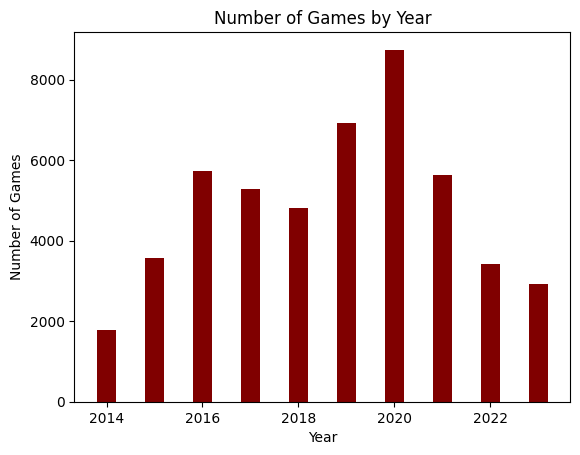

In [82]:
number_of_games = list(map(lambda item: item[0], number_of_games_by_years))
years = list(map(lambda item: item[1], number_of_games_by_years))

print(number_of_games)
print(years)

plt.bar(years, number_of_games, color ='maroon', width = 0.4)
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.title("Number of Games by Year")
plt.show()

In [83]:
connection.close()